## Seoul Bike Sharing Forecasting

- https://www.kaggle.com/code/abhi10699/seoul-bike-sharing-forecasting

In [1]:

import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings('ignore')
plt.style.use("seaborn-v0_8-whitegrid")
%matplotlib inline

pd.options.display.max_columns = 999

In [2]:
df = pd.read_csv("../data/SeoulBikeData.csv", encoding="unicode_escape")

In [3]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
df.shape

(8760, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [7]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

## EDA

- Dew point temperature(°C)
- Solar Radiation (MJ/m2)
- Humidity(%)

이 모든 변수는 온도 변수에 의해 집합적으로 정의됩니다. 이 변수가 대여 자전거 수와 어떤 관계가 있는지 살펴보겠습니다. 전체적으로 온도는 대여 수요와 관련이 있어야 합니다.

### Hypothesis to Test

낮은 온도 = 수요 감소 높은 온도 = 수요 감소 중간 온도 = 수요 증가

이 경우 데이터 세트 내에 비선형 관계가 존재하므로 신경망이나 일부 앙상블 방법을 사용해야 할 수 있습니다.

- 휴일 : 휴일에는 사람들이 더 많이 빌리나요, 덜 빌리나요?

- 시간: 가장 바쁜 시간대는 언제인가요?

- 날짜: 계절별 패턴을 관찰하세요.

- 강우량

  - 서울에 비가 자주 오나요?
  - 비가 온다면? 임대료에 어떤 영향을 미치나요?
- 강설량: 눈이 내리는 동안에는 대여가 거의 또는 전혀 이루어지지 않습니다.

<Axes: xlabel='Temperature(°C)', ylabel='Rented Bike Count'>

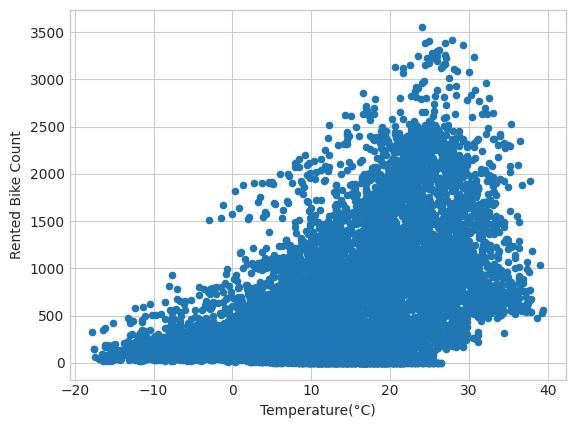

In [8]:
df[['Temperature(°C)', 'Rented Bike Count']].plot(kind="scatter", x="Temperature(°C)",y="Rented Bike Count")

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

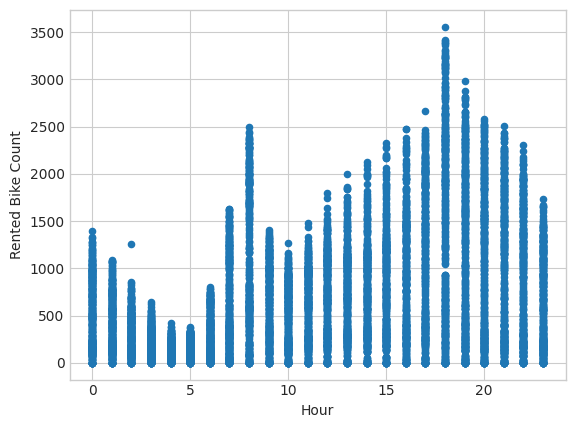

In [9]:
df[['Hour', 'Rented Bike Count']].plot(kind="scatter", x="Hour",y="Rented Bike Count")

<Axes: xlabel='Snowfall (cm)', ylabel='Rented Bike Count'>

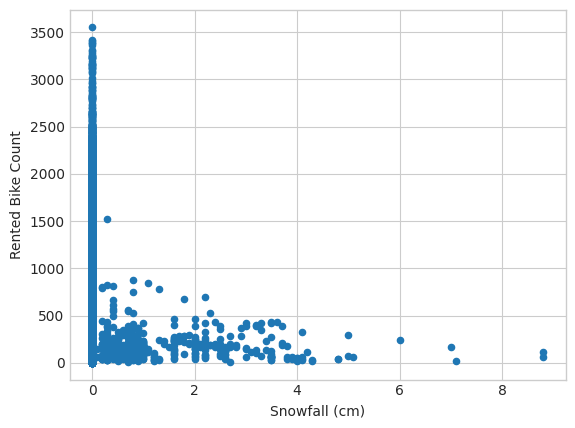

In [10]:
df[['Snowfall (cm)', 'Rented Bike Count']].plot(kind="scatter", x="Snowfall (cm)",y="Rented Bike Count")

<Axes: xlabel='Rainfall(mm)', ylabel='Rented Bike Count'>

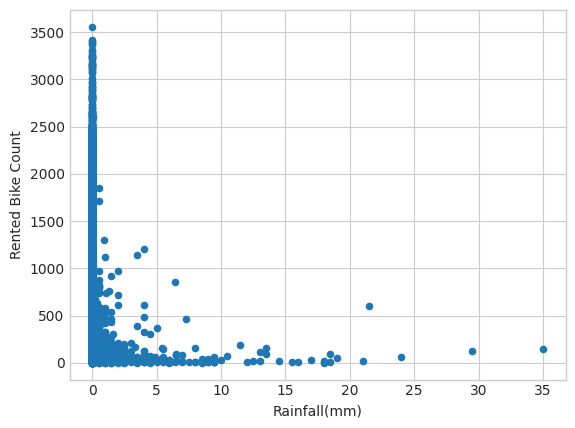

In [11]:
df[['Rainfall(mm)', 'Rented Bike Count']].plot(kind="scatter", x="Rainfall(mm)",y="Rented Bike Count")

<Axes: ylabel='Seasons'>

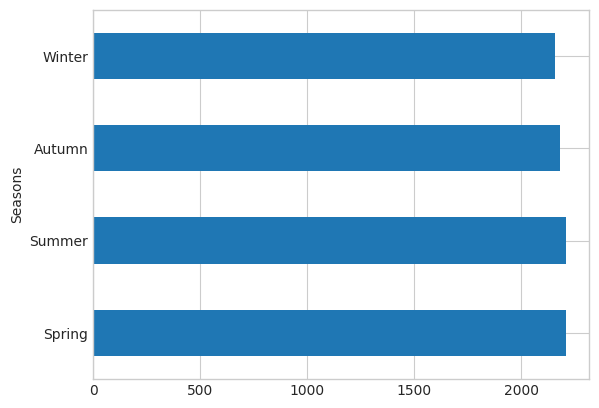

In [12]:
df['Seasons'].value_counts().plot(kind="barh")

- 데이터 분포가 균등하다.

In [13]:
season_groups = df.groupby(by='Seasons')

In [14]:
season_groups.get_group("Winter")

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,2018-02-28,19,19,2.5,95,1.9,838,1.7,0.0,0.0,0.0,Winter,No Holiday,Yes
2156,2018-02-28,8,20,2.7,96,1.5,1479,2.1,0.0,0.0,0.0,Winter,No Holiday,Yes
2157,2018-02-28,10,21,2.4,95,2.5,1349,1.6,0.0,9.0,0.0,Winter,No Holiday,Yes
2158,2018-02-28,13,22,2.3,96,1.9,1207,1.7,0.0,0.0,0.0,Winter,No Holiday,Yes


In [15]:
season_groups.get_group("Winter").describe()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,2160,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000
mean,2018-01-14 12:00:00,225.541204,11.500000,-2.540463,49.744907,1.922685,1445.987037,-12.416667,0.298181,0.032824,0.247500
min,2017-12-01 00:00:00,3.000000,0.000000,-17.800000,14.000000,0.000000,54.000000,-30.600000,0.000000,0.000000,0.000000
25%,2017-12-23 00:00:00,110.000000,5.750000,-6.200000,34.000000,1.000000,953.750000,-18.600000,0.000000,0.000000,0.000000
50%,2018-01-14 12:00:00,203.000000,11.500000,-2.200000,47.000000,1.700000,1762.000000,-13.000000,0.000000,0.000000,0.000000
75%,2018-02-06 00:00:00,305.000000,17.250000,1.500000,63.000000,2.700000,1998.000000,-6.200000,0.452500,0.000000,0.000000
max,2018-02-28 00:00:00,937.000000,23.000000,10.300000,97.000000,6.700000,2000.000000,4.200000,2.520000,9.500000,5.100000
std,NaN,150.372236,6.923789,5.469763,19.303054,1.156028,634.856446,7.715812,0.523243,0.422526,0.698369


In [16]:
season_groups.get_group("Summer").describe()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,2208,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.0
mean,2018-07-16 12:00:00,1034.073370,11.500000,26.582790,64.981431,1.609420,1501.745471,18.750136,0.761255,0.253487,0.0
min,2018-06-01 00:00:00,9.000000,0.000000,16.300000,21.000000,0.000000,70.000000,0.000000,0.000000,0.000000,0.0
25%,2018-06-23 18:00:00,526.750000,5.750000,23.100000,52.000000,0.900000,1076.750000,15.500000,0.000000,0.000000,0.0
50%,2018-07-16 12:00:00,905.500000,11.500000,26.600000,65.000000,1.500000,1740.500000,20.000000,0.160000,0.000000,0.0
75%,2018-08-08 06:00:00,1442.500000,17.250000,29.800000,79.000000,2.200000,1999.000000,22.000000,1.360000,0.000000,0.0
max,2018-08-31 00:00:00,3556.000000,23.000000,39.400000,98.000000,6.900000,2000.000000,27.200000,3.450000,29.500000,0.0
std,NaN,690.244759,6.923755,4.662299,17.570961,0.914289,540.543965,4.329900,0.999001,1.587507,0.0


In [17]:
season_groups.get_group("Spring").describe()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,2208,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.00000,2208.0
mean,2018-04-15 12:00:00,730.031250,11.500000,13.046694,58.776721,1.874592,1240.364583,4.120063,0.688786,0.18288,0.0
min,2018-03-01 00:00:00,0.000000,0.000000,-6.600000,0.000000,0.100000,27.000000,-18.100000,0.000000,0.00000,0.0
25%,2018-03-23 18:00:00,206.000000,5.750000,8.200000,42.000000,1.100000,606.750000,-1.300000,0.000000,0.00000,0.0
50%,2018-04-15 12:00:00,583.000000,11.500000,13.300000,58.000000,1.700000,1307.500000,4.600000,0.060000,0.00000,0.0
75%,2018-05-08 06:00:00,1105.250000,17.250000,18.100000,77.250000,2.500000,1911.250000,9.400000,1.145000,0.00000,0.0
max,2018-05-31 00:00:00,3251.000000,23.000000,29.400000,98.000000,7.400000,2000.000000,22.000000,3.520000,35.00000,0.0
std,NaN,621.509635,6.923755,6.617154,22.573616,1.071014,637.958321,7.473330,0.986609,1.20144,0.0


In [18]:
season_groups.get_group("Autumn").describe()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,2184,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000
mean,2018-10-16 00:00:00,819.597985,11.500000,14.120833,59.228480,1.494734,1560.752289,5.498718,0.521818,0.122756,0.056319
min,2018-09-01 00:00:00,0.000000,0.000000,-3.000000,13.000000,0.000000,33.000000,-19.000000,0.000000,0.000000,0.000000
25%,2018-09-23 00:00:00,241.750000,5.750000,8.575000,44.000000,0.800000,1181.750000,0.675000,0.000000,0.000000,0.000000
50%,2018-10-16 00:00:00,763.500000,11.500000,13.850000,59.000000,1.300000,1900.000000,5.500000,0.000000,0.000000,0.000000
75%,2018-11-08 00:00:00,1197.500000,17.250000,19.800000,74.000000,2.000000,2000.000000,10.825000,0.892500,0.000000,0.000000
max,2018-11-30 00:00:00,3298.000000,23.000000,30.500000,97.000000,5.700000,2000.000000,23.900000,3.120000,18.000000,8.800000
std,NaN,651.085621,6.923772,7.062297,18.686445,0.924440,566.091118,7.819155,0.798543,0.947098,0.491752


<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

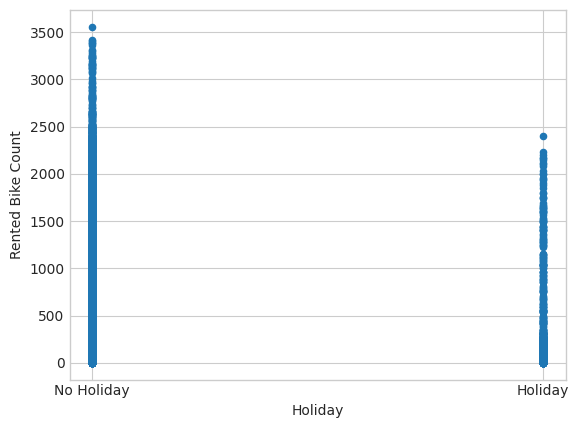

In [19]:
df[['Holiday', 'Rented Bike Count']].plot(kind="scatter", x="Holiday",y="Rented Bike Count")

<Axes: xlabel='Date'>

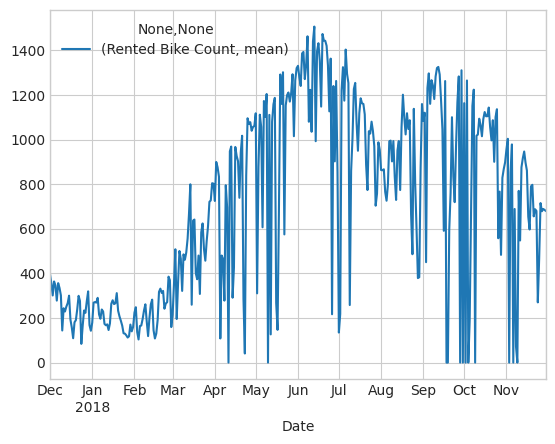

In [20]:
df.groupby(by="Date").agg({'Rented Bike Count': ['mean']}).plot()

<Axes: xlabel='Functioning Day', ylabel='Rented Bike Count'>

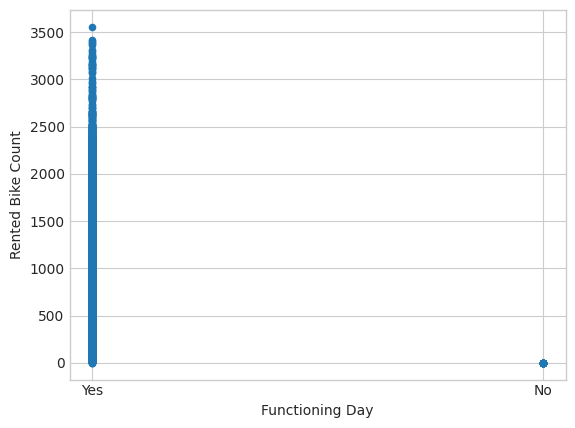

In [21]:
df[['Functioning Day', 'Rented Bike Count']].plot(kind="scatter", x="Functioning Day",y="Rented Bike Count")

- functioning day: 근무일

In [22]:
def preprocess_df(df):
    df = df.copy()

    # drop functioning days
    
    df = df.drop(['Functioning Day'], axis=1)
    
    # convert colum to datetime
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
    
    # day of the week
    df['day_of_week'] = df['Date'].apply(lambda x: x.dayofweek)
    df['month_of_year'] = df['Date'].apply(lambda x: x.month)
    df['year'] = df['Date'].apply(lambda x: x.year)
    
    
    # drop 0 rented bike rows
    
    no_rent_rows = df[df['Rented Bike Count'] == 0].index
    df = df.drop(no_rent_rows, axis=0)
    
    
    # one hot encoding 
    
    seasons_onehot = pd.get_dummies(df['Seasons'], prefix="Seasons", dtype=int)
    holiday_onehot = pd.get_dummies(df['Holiday'], prefix="Holiday", dtype=int)
    
    df = pd.concat([df, seasons_onehot,holiday_onehot], axis=1)
    
    # drop categorical columns
    
    df = df.drop(['Seasons','Holiday'], axis=1)
        
    return df

In [23]:
df.shape

(8760, 14)

In [24]:
cleaned = preprocess_df(df)
cleaned.shape

(8465, 20)

In [25]:
cleaned.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),day_of_week,month_of_year,year,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,4,12,2017,0,0,0,1,0,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,4,12,2017,0,0,0,1,0,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,4,12,2017,0,0,0,1,0,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,4,12,2017,0,0,0,1,0,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,4,12,2017,0,0,0,1,0,1


<Axes: >

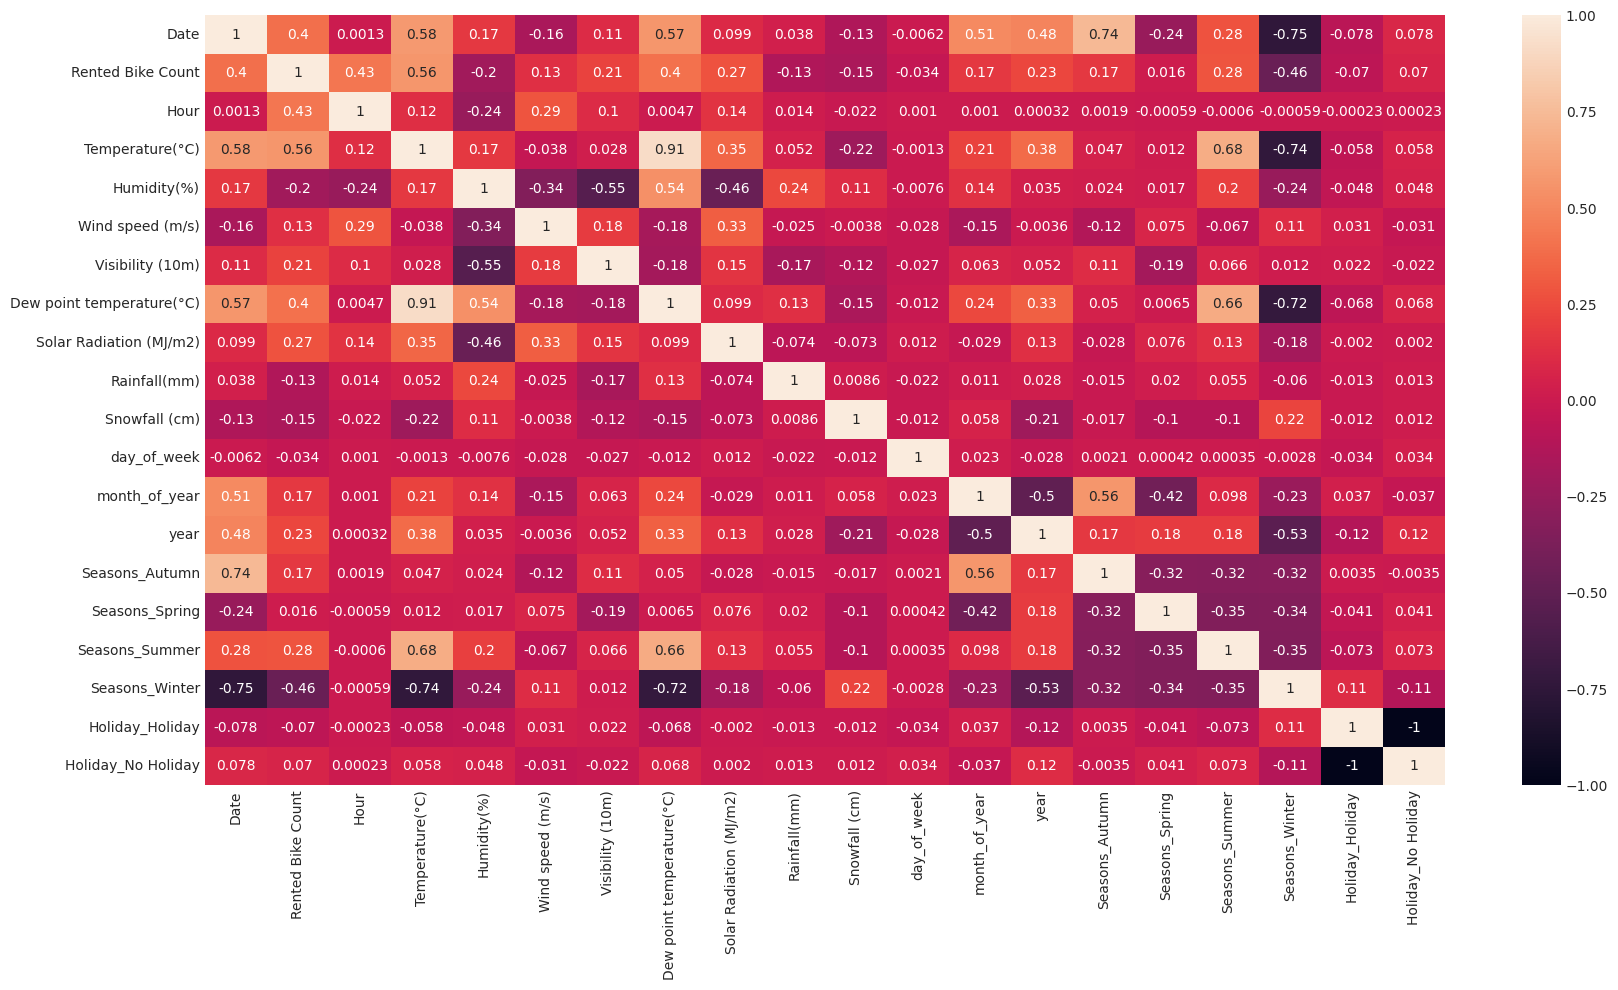

In [26]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(cleaned.corr(), annot=True)

## Feature Engineering
과거 시점 피처 추가

In [27]:
def add_lag_features(df, rolling = 1):
    df = df.copy()
    
    # add the history of demand in the last hour
    df['demand_lag_1hr'] = df['Rented Bike Count'].rolling(rolling, closed="left").mean()
    df['temperature_lag_1hr'] = df['Temperature(°C)'].rolling(rolling, closed="left").mean()
    df['rainfall_lag_1hr'] = df['Rainfall(mm)'].rolling(rolling, closed="left").mean()
    df['snowfall_lag_1hr'] = df['Snowfall (cm)'].rolling(rolling, closed="left").mean()
    
    
    df = df.dropna()
    
    return df

In [28]:
cleaned = add_lag_features(cleaned,rolling=1)
cleaned.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),day_of_week,month_of_year,year,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,demand_lag_1hr,temperature_lag_1hr,rainfall_lag_1hr,snowfall_lag_1hr
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,4,12,2017,0,0,0,1,0,1,254.0,-5.2,0.0,0.0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,4,12,2017,0,0,0,1,0,1,204.0,-5.5,0.0,0.0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,4,12,2017,0,0,0,1,0,1,173.0,-6.0,0.0,0.0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,4,12,2017,0,0,0,1,0,1,107.0,-6.2,0.0,0.0
5,2017-12-01,100,5,-6.4,37,1.5,2000,-18.7,0.0,0.0,0.0,4,12,2017,0,0,0,1,0,1,78.0,-6.0,0.0,0.0


## Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [30]:
def scale_features(df):
    df = df.copy()
    
    standard_scale_features = [   
        'Temperature(°C)',
        'Humidity(%)',
        'Wind speed (m/s)',
        'Visibility (10m)',
        'Rainfall(mm)',
        'Snowfall (cm)',
    ] 
    
    min_max_scale_features = [
        'Hour',
        'day_of_week',
        'month_of_year'
    ]
    
    # standard scale
    
    for feature in standard_scale_features:
        scaler = StandardScaler()
        df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1)) 
    
    # minmax 
    
    for feature in min_max_scale_features:
        scaler = MinMaxScaler()
        df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))
    
    return df

## Train/ Test Split

In [31]:
threshold_date = pd.to_datetime("2018-10-31")
train = cleaned[cleaned['Date'] < threshold_date]
test = cleaned[cleaned['Date'] > threshold_date]

In [32]:
DO_SCALE = False

if DO_SCALE:
    train = scale_features(train)
    test = scale_features(test)

In [33]:
train.shape, test.shape

((7792, 24), (648, 24))

In [34]:
train.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),day_of_week,month_of_year,year,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,demand_lag_1hr,temperature_lag_1hr,rainfall_lag_1hr,snowfall_lag_1hr
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,4,12,2017,0,0,0,1,0,1,254.0,-5.2,0.0,0.0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,4,12,2017,0,0,0,1,0,1,204.0,-5.5,0.0,0.0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,4,12,2017,0,0,0,1,0,1,173.0,-6.0,0.0,0.0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,4,12,2017,0,0,0,1,0,1,107.0,-6.2,0.0,0.0
5,2017-12-01,100,5,-6.4,37,1.5,2000,-18.7,0.0,0.0,0.0,4,12,2017,0,0,0,1,0,1,78.0,-6.0,0.0,0.0


In [35]:
test.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),day_of_week,month_of_year,year,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,demand_lag_1hr,temperature_lag_1hr,rainfall_lag_1hr,snowfall_lag_1hr
8040,2018-11-01,584,0,5.7,62,2.3,1909,-1.0,0.0,0.0,0.0,3,11,2018,1,0,0,0,0,1,798.0,6.4,0.0,0.0
8041,2018-11-01,524,1,5.1,65,1.6,1932,-0.9,0.0,0.0,0.0,3,11,2018,1,0,0,0,0,1,584.0,5.7,0.0,0.0
8042,2018-11-01,362,2,4.4,64,1.4,2000,-1.8,0.0,0.0,0.0,3,11,2018,1,0,0,0,0,1,524.0,5.1,0.0,0.0
8043,2018-11-01,242,3,4.2,65,0.7,1962,-1.8,0.0,0.0,0.0,3,11,2018,1,0,0,0,0,1,362.0,4.4,0.0,0.0
8044,2018-11-01,147,4,3.6,70,0.8,1934,-1.3,0.0,0.0,0.0,3,11,2018,1,0,0,0,0,1,242.0,4.2,0.0,0.0


## Predictors

In [36]:
predictors = [
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'day_of_week',
 'month_of_year',
 'Seasons_Autumn',
 'Seasons_Spring',
 'Seasons_Summer',
 'Seasons_Winter',
 'Holiday_Holiday',
 'Holiday_No Holiday',
 'demand_lag_1hr',
 'temperature_lag_1hr',
 'rainfall_lag_1hr',
 'snowfall_lag_1hr',  
]

labels = ['Rented Bike Count']

## Modeling

In [37]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


from sklearn.metrics import mean_squared_error, r2_score

In [38]:
def test_model(model, df_train, df_test, predictors, labels):
    model.fit(df_train[predictors], df_train[labels].values.ravel())
    
    # training score
    train_preds = model.predict(df_train[predictors])
    train_rmse = np.sqrt(mean_squared_error(df_train[labels], train_preds))
    
    # testing score
    
    test_preds = model.predict(df_test[predictors])
    test_rmse = np.sqrt(mean_squared_error(df_test[labels], test_preds))
    
    
    print(f"Train RMSE: {train_rmse}\nTest RMSE: {test_rmse}")
    
    test_df = pd.DataFrame({"Actual": list(df_test[labels].values.flatten()), "Predicted": test_preds.flatten()})
    return train_rmse, test_rmse, test_df, model

In [39]:
ridge_train_rmse, ridge_test_rmse, ridge_pred_df, ridge_model = test_model(Ridge(alpha=0.1), train, test, predictors, labels)


Train RMSE: 266.0795178081973
Test RMSE: 271.597283501904


In [40]:
rf_train_rmse, rf_test_rmse, rf_pred_df, rf_model = test_model(
    RandomForestRegressor(n_estimators=10,min_samples_split=5), 
    train, 
    test, 
    predictors, 
    labels
)

Train RMSE: 60.2539672888558
Test RMSE: 105.25810676490852


In [41]:
xgr_train_rmse, xgr_test_rmse, xgr_pred_df, xgr_model = test_model(
    XGBRegressor(), 
    train, 
    test, 
    predictors, 
    labels
)

Train RMSE: 47.335442955852244
Test RMSE: 97.88228724808019


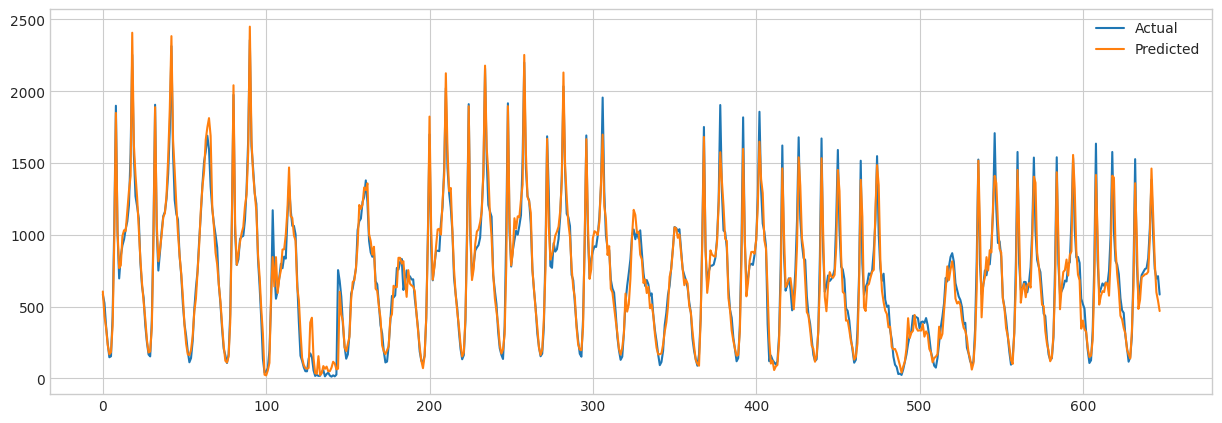

In [42]:
xgr_pred_df.plot(figsize=(15,5))
plt.show()